# Getting The Data

### Setup IG Session

In [533]:
pip install trading_ig pandas munch tenacity

Note: you may need to restart the kernel to use updated packages.


In [534]:
import os
os.getcwd()

'D:\\ScalpFX\\src'

In [535]:
from configparser import ConfigParser

config_object = ConfigParser()
config_object.read('../credentials/trading_ig_config.ini')
config = config_object['live']

# Create a Config file (trading_ig_config.ini) of your credential in the following format:-
# 
# [demo]
# username = <USERNAME>
# password = <PASSWORD>
# api_key = <API_KEY>
# acc_type = DEMO
# acc_number = <123ABC>
#
# [live]
# username = <USERNAME>
# password = <PASSWORD>
# api_key = <API_KEY>
# acc_type = LIVE
# acc_number = <123ABC>

In [536]:
from trading_ig.rest import IGService

ig_service = IGService(config['username'], config['password'], config['api_key'], config['acc_type'])
ig_acc_details = ig_service.create_session()
ig_acc_details

{'accountType': 'CFD',
 'accountInfo': {'balance': 237.01,
  'deposit': 52.86,
  'profitLoss': -29.4,
  'available': 154.75},
 'currencyIsoCode': 'USD',
 'currencySymbol': '$',
 'currentAccountId': 'QM0EM',
 'lightstreamerEndpoint': 'https://apd.marketdatasystems.com',
 'accounts': [{'accountId': 'QM0EM',
   'accountName': 'CFD Live',
   'preferred': True,
   'accountType': 'CFD'}],
 'clientId': '104831189',
 'timezoneOffset': 8,
 'hasActiveDemoAccounts': True,
 'hasActiveLiveAccounts': True,
 'trailingStopsEnabled': False,
 'reroutingEnvironment': None,
 'dealingEnabled': True}

### Get the Historical Data of GBP/USD Mini

In [537]:
TARGET_EPIC = 'CS.D.GBPUSD.MINI.IP'
RESOLUTION = '15Min'
# PREVIOUS_MONTHS_COUNT_FROM_TODAY = 4
PREVIOUS_DAY_COUNT_FROM_TODAY = 2

In [538]:
# Get today's next day date as End Date, and previous X month(s) from today as Start Date

from datetime import datetime, date
from dateutil.relativedelta import relativedelta

end_date = datetime.combine(date.today() + relativedelta(days=1), datetime.min.time())
# start_date = datetime.combine(date.today() - relativedelta(months=PREVIOUS_MONTHS_COUNT_FROM_TODAY), datetime.min.time())
start_date = datetime.combine(date.today() - relativedelta(days=PREVIOUS_DAY_COUNT_FROM_TODAY), datetime.min.time())

print(f'''End: {end_date}''')
print(f'''Start: {start_date}''')

End: 2022-05-08 00:00:00
Start: 2022-05-05 00:00:00


In [539]:
LOCAL_READ = False

try:
    history = ig_service.fetch_historical_prices_by_epic_and_date_range(TARGET_EPIC, 
                                                                       RESOLUTION, 
                                                                       start_date, 
                                                                       end_date)
    history['prices']
except:
    LOCAL_READ = True

In [540]:
# If API failed, read data from saved Excel File

from os import listdir
from os.path import isfile, join
    
def readLatestFile(TARGET_EPIC, RESOLUTION, DATA_PATH):
    onlyfiles = [f for f in listdir(DATA_PATH) if isfile(join(DATA_PATH, f))]
    onlyfiles.sort(reverse=True)
    for fileName in onlyfiles:
        if TARGET_EPIC in fileName and RESOLUTION in fileName:
            return fileName
        
    return ''

In [541]:
import pandas as pd

DATA_PATH = '../data/'

if LOCAL_READ:
    print(f'''{DATA_PATH}{readLatestFile(TARGET_EPIC, RESOLUTION, DATA_PATH)}''')
    df_history = pd.read_excel(f'''{DATA_PATH}{readLatestFile(TARGET_EPIC, RESOLUTION, DATA_PATH)}''', 
                               index_col=[0], header=[0,1])
    df_history = df_history.rename(columns={df_history.columns[0][1]:''}, level=1)
else:
    print('Retrieved from API')
    df_history = pd.DataFrame.from_dict(history['prices'])
    df_history = df_history.reset_index()
    
df_history

Retrieved from API


DateTime      bid                                 ask           \
                            Open     High      Low    Close     Open     High   
0   2022-05-05 00:00:00  1.24874  1.24933  1.24802  1.24861  1.24883  1.24943   
1   2022-05-05 00:15:00  1.24863  1.24904  1.24787  1.24901  1.24872  1.24913   
2   2022-05-05 00:30:00  1.24899  1.24920  1.24824  1.24839  1.24908  1.24929   
3   2022-05-05 00:45:00  1.24838  1.24941  1.24808  1.24936  1.24847  1.24950   
4   2022-05-05 01:00:00  1.24937  1.24999  1.24904  1.24929  1.24946  1.25011   
..                  ...      ...      ...      ...      ...      ...      ...   
192 2022-05-07 00:00:00  1.23437  1.23586  1.23406  1.23449  1.23452  1.23598   
193 2022-05-07 00:15:00  1.23447  1.23565  1.23425  1.23553  1.23456  1.23575   
194 2022-05-07 00:30:00  1.23555  1.23596  1.23514  1.23565  1.23564  1.23606   
195 2022-05-07 00:45:00  1.23566  1.23615  1.23518  1.23567  1.23575  1.23626   
196 2022-05-07 01:00:00  1.23565  1.23608  1.23546  1.23607  1.23580  1.23617   

                      last                        
         Low    Close Open High Low Close Volume  
0    1.24811  1.24870  NaN  NaN NaN   NaN   1785  
1    1.24796  1.24910  NaN  NaN NaN   NaN   1958  
2    1.24833  1.24848  NaN  NaN NaN   NaN   1665  
3    1.24817  1.24945  NaN  NaN NaN   NaN   1538  
4    1.24916  1.24938  NaN  NaN NaN   NaN   1590  
..       ...      ...  ...  ...  ..   ...    ...  
192  1.23415  1.23458  NaN  NaN NaN   NaN   3079  
193  1.23434  1.23562  NaN  NaN NaN   NaN   3403  
194  1.23524  1.23574  NaN  NaN NaN   NaN   3120  
195  1.23527  1.23576  NaN  NaN NaN   NaN   2633  
196  1.23555  1.23616  NaN  NaN NaN   NaN    683  

[197 rows x 14 columns]

In [542]:
df_history = df_history.sort_values(by=['DateTime'], ascending=False)
df_history

DateTime      bid                                 ask           \
                            Open     High      Low    Close     Open     High   
196 2022-05-07 01:00:00  1.23565  1.23608  1.23546  1.23607  1.23580  1.23617   
195 2022-05-07 00:45:00  1.23566  1.23615  1.23518  1.23567  1.23575  1.23626   
194 2022-05-07 00:30:00  1.23555  1.23596  1.23514  1.23565  1.23564  1.23606   
193 2022-05-07 00:15:00  1.23447  1.23565  1.23425  1.23553  1.23456  1.23575   
192 2022-05-07 00:00:00  1.23437  1.23586  1.23406  1.23449  1.23452  1.23598   
..                  ...      ...      ...      ...      ...      ...      ...   
4   2022-05-05 01:00:00  1.24937  1.24999  1.24904  1.24929  1.24946  1.25011   
3   2022-05-05 00:45:00  1.24838  1.24941  1.24808  1.24936  1.24847  1.24950   
2   2022-05-05 00:30:00  1.24899  1.24920  1.24824  1.24839  1.24908  1.24929   
1   2022-05-05 00:15:00  1.24863  1.24904  1.24787  1.24901  1.24872  1.24913   
0   2022-05-05 00:00:00  1.24874  1.24933  1.24802  1.24861  1.24883  1.24943   

                      last                        
         Low    Close Open High Low Close Volume  
196  1.23555  1.23616  NaN  NaN NaN   NaN    683  
195  1.23527  1.23576  NaN  NaN NaN   NaN   2633  
194  1.23524  1.23574  NaN  NaN NaN   NaN   3120  
193  1.23434  1.23562  NaN  NaN NaN   NaN   3403  
192  1.23415  1.23458  NaN  NaN NaN   NaN   3079  
..       ...      ...  ...  ...  ..   ...    ...  
4    1.24916  1.24938  NaN  NaN NaN   NaN   1590  
3    1.24817  1.24945  NaN  NaN NaN   NaN   1538  
2    1.24833  1.24848  NaN  NaN NaN   NaN   1665  
1    1.24796  1.24910  NaN  NaN NaN   NaN   1958  
0    1.24811  1.24870  NaN  NaN NaN   NaN   1785  

[197 rows x 14 columns]

In [543]:
df_history.describe()

bid                                             ask              \
             Open        High         Low       Close        Open        High   
count  197.000000  197.000000  197.000000  197.000000  197.000000  197.000000   
mean     1.243919    1.244752    1.243071    1.243856    1.244098    1.244930   
std      0.011148    0.011080    0.011209    0.011154    0.011174    0.011109   
min      1.227760    1.231020    1.227570    1.227770    1.227910    1.231140   
25%      1.235060    1.235860    1.234150    1.235070    1.235150    1.236040   
50%      1.236970    1.237410    1.236290    1.236940    1.237120    1.237520   
75%      1.255130    1.255980    1.254300    1.255120    1.255250    1.256080   
max      1.263430    1.263770    1.262950    1.263410    1.263810    1.264080   

                              last                               
              Low       Close Open High  Low Close       Volume  
count  197.000000  197.000000  0.0  0.0  0.0   0.0   197.000000  
mean     1.243244    1.244032  NaN  NaN  NaN   NaN  2388.390863  
std      0.011227    0.011180  NaN  NaN  NaN   NaN  1251.313263  
min      1.227660    1.227920  NaN  NaN  NaN   NaN   360.000000  
25%      1.234340    1.235160  NaN  NaN  NaN   NaN  1435.000000  
50%      1.236420    1.237090  NaN  NaN  NaN   NaN  2248.000000  
75%      1.254440    1.255270  NaN  NaN  NaN   NaN  3079.000000  
max      1.263640    1.263820  NaN  NaN  NaN   NaN  7683.000000

In [544]:
# Data local backup

if not LOCAL_READ:
    df_history.to_excel(f'''../data/{TARGET_EPIC}-{RESOLUTION}_{date.today()}.xlsx''', index=True)

# Data Transformation

### Getting the Mid values based on Bid and Ask values

In [545]:
df_history2 = df_history.copy()
df_history2

DateTime      bid                                 ask           \
                            Open     High      Low    Close     Open     High   
196 2022-05-07 01:00:00  1.23565  1.23608  1.23546  1.23607  1.23580  1.23617   
195 2022-05-07 00:45:00  1.23566  1.23615  1.23518  1.23567  1.23575  1.23626   
194 2022-05-07 00:30:00  1.23555  1.23596  1.23514  1.23565  1.23564  1.23606   
193 2022-05-07 00:15:00  1.23447  1.23565  1.23425  1.23553  1.23456  1.23575   
192 2022-05-07 00:00:00  1.23437  1.23586  1.23406  1.23449  1.23452  1.23598   
..                  ...      ...      ...      ...      ...      ...      ...   
4   2022-05-05 01:00:00  1.24937  1.24999  1.24904  1.24929  1.24946  1.25011   
3   2022-05-05 00:45:00  1.24838  1.24941  1.24808  1.24936  1.24847  1.24950   
2   2022-05-05 00:30:00  1.24899  1.24920  1.24824  1.24839  1.24908  1.24929   
1   2022-05-05 00:15:00  1.24863  1.24904  1.24787  1.24901  1.24872  1.24913   
0   2022-05-05 00:00:00  1.24874  1.24933  1.24802  1.24861  1.24883  1.24943   

                      last                        
         Low    Close Open High Low Close Volume  
196  1.23555  1.23616  NaN  NaN NaN   NaN    683  
195  1.23527  1.23576  NaN  NaN NaN   NaN   2633  
194  1.23524  1.23574  NaN  NaN NaN   NaN   3120  
193  1.23434  1.23562  NaN  NaN NaN   NaN   3403  
192  1.23415  1.23458  NaN  NaN NaN   NaN   3079  
..       ...      ...  ...  ...  ..   ...    ...  
4    1.24916  1.24938  NaN  NaN NaN   NaN   1590  
3    1.24817  1.24945  NaN  NaN NaN   NaN   1538  
2    1.24833  1.24848  NaN  NaN NaN   NaN   1665  
1    1.24796  1.24910  NaN  NaN NaN   NaN   1958  
0    1.24811  1.24870  NaN  NaN NaN   NaN   1785  

[197 rows x 14 columns]

In [546]:
# Remove NaN Columns
df_history2 = df_history2.drop(df_history2.columns[[9,10,11,12]], axis=1)
df_history2

DateTime      bid                                 ask           \
                            Open     High      Low    Close     Open     High   
196 2022-05-07 01:00:00  1.23565  1.23608  1.23546  1.23607  1.23580  1.23617   
195 2022-05-07 00:45:00  1.23566  1.23615  1.23518  1.23567  1.23575  1.23626   
194 2022-05-07 00:30:00  1.23555  1.23596  1.23514  1.23565  1.23564  1.23606   
193 2022-05-07 00:15:00  1.23447  1.23565  1.23425  1.23553  1.23456  1.23575   
192 2022-05-07 00:00:00  1.23437  1.23586  1.23406  1.23449  1.23452  1.23598   
..                  ...      ...      ...      ...      ...      ...      ...   
4   2022-05-05 01:00:00  1.24937  1.24999  1.24904  1.24929  1.24946  1.25011   
3   2022-05-05 00:45:00  1.24838  1.24941  1.24808  1.24936  1.24847  1.24950   
2   2022-05-05 00:30:00  1.24899  1.24920  1.24824  1.24839  1.24908  1.24929   
1   2022-05-05 00:15:00  1.24863  1.24904  1.24787  1.24901  1.24872  1.24913   
0   2022-05-05 00:00:00  1.24874  1.24933  1.24802  1.24861  1.24883  1.24943   

                        last  
         Low    Close Volume  
196  1.23555  1.23616    683  
195  1.23527  1.23576   2633  
194  1.23524  1.23574   3120  
193  1.23434  1.23562   3403  
192  1.23415  1.23458   3079  
..       ...      ...    ...  
4    1.24916  1.24938   1590  
3    1.24817  1.24945   1538  
2    1.24833  1.24848   1665  
1    1.24796  1.24910   1958  
0    1.24811  1.24870   1785  

[197 rows x 10 columns]

In [547]:
pip install round2

Note: you may need to restart the kernel to use updated packages.


In [548]:
from round2 import round2

def averageTwoFloats(x,y):
    return round2((x+y)/2, 5)

In [549]:
df_history2[('mid', 'Open')]  = df_history2.apply(lambda x: averageTwoFloats(x[('bid', 'Open')],  x[('ask', 'Open')]), axis=1)
df_history2[('mid', 'High')]  = df_history2.apply(lambda x: averageTwoFloats(x[('bid', 'High')],  x[('ask', 'High')]), axis=1)
df_history2[('mid', 'Low')]   = df_history2.apply(lambda x: averageTwoFloats(x[('bid', 'Low')],   x[('ask', 'Low')]), axis=1)
df_history2[('mid', 'Close')] = df_history2.apply(lambda x: averageTwoFloats(x[('bid', 'Close')], x[('ask', 'Close')]), axis=1)

df_history2

DateTime      bid                                 ask           \
                            Open     High      Low    Close     Open     High   
196 2022-05-07 01:00:00  1.23565  1.23608  1.23546  1.23607  1.23580  1.23617   
195 2022-05-07 00:45:00  1.23566  1.23615  1.23518  1.23567  1.23575  1.23626   
194 2022-05-07 00:30:00  1.23555  1.23596  1.23514  1.23565  1.23564  1.23606   
193 2022-05-07 00:15:00  1.23447  1.23565  1.23425  1.23553  1.23456  1.23575   
192 2022-05-07 00:00:00  1.23437  1.23586  1.23406  1.23449  1.23452  1.23598   
..                  ...      ...      ...      ...      ...      ...      ...   
4   2022-05-05 01:00:00  1.24937  1.24999  1.24904  1.24929  1.24946  1.25011   
3   2022-05-05 00:45:00  1.24838  1.24941  1.24808  1.24936  1.24847  1.24950   
2   2022-05-05 00:30:00  1.24899  1.24920  1.24824  1.24839  1.24908  1.24929   
1   2022-05-05 00:15:00  1.24863  1.24904  1.24787  1.24901  1.24872  1.24913   
0   2022-05-05 00:00:00  1.24874  1.24933  1.24802  1.24861  1.24883  1.24943   

                        last      mid                             
         Low    Close Volume     Open     High      Low    Close  
196  1.23555  1.23616    683  1.23573  1.23612  1.23550  1.23611  
195  1.23527  1.23576   2633  1.23570  1.23621  1.23523  1.23571  
194  1.23524  1.23574   3120  1.23560  1.23601  1.23519  1.23570  
193  1.23434  1.23562   3403  1.23452  1.23570  1.23429  1.23557  
192  1.23415  1.23458   3079  1.23445  1.23592  1.23411  1.23454  
..       ...      ...    ...      ...      ...      ...      ...  
4    1.24916  1.24938   1590  1.24942  1.25005  1.24910  1.24933  
3    1.24817  1.24945   1538  1.24843  1.24946  1.24813  1.24940  
2    1.24833  1.24848   1665  1.24904  1.24925  1.24829  1.24844  
1    1.24796  1.24910   1958  1.24868  1.24909  1.24791  1.24906  
0    1.24811  1.24870   1785  1.24879  1.24938  1.24807  1.24865  

[197 rows x 14 columns]

In [550]:
df_history2 = df_history2.drop(df_history2.head(1).index)
df_history2

DateTime      bid                                 ask           \
                            Open     High      Low    Close     Open     High   
195 2022-05-07 00:45:00  1.23566  1.23615  1.23518  1.23567  1.23575  1.23626   
194 2022-05-07 00:30:00  1.23555  1.23596  1.23514  1.23565  1.23564  1.23606   
193 2022-05-07 00:15:00  1.23447  1.23565  1.23425  1.23553  1.23456  1.23575   
192 2022-05-07 00:00:00  1.23437  1.23586  1.23406  1.23449  1.23452  1.23598   
191 2022-05-06 23:45:00  1.23608  1.23622  1.23427  1.23436  1.23623  1.23631   
..                  ...      ...      ...      ...      ...      ...      ...   
4   2022-05-05 01:00:00  1.24937  1.24999  1.24904  1.24929  1.24946  1.25011   
3   2022-05-05 00:45:00  1.24838  1.24941  1.24808  1.24936  1.24847  1.24950   
2   2022-05-05 00:30:00  1.24899  1.24920  1.24824  1.24839  1.24908  1.24929   
1   2022-05-05 00:15:00  1.24863  1.24904  1.24787  1.24901  1.24872  1.24913   
0   2022-05-05 00:00:00  1.24874  1.24933  1.24802  1.24861  1.24883  1.24943   

                        last      mid                             
         Low    Close Volume     Open     High      Low    Close  
195  1.23527  1.23576   2633  1.23570  1.23621  1.23523  1.23571  
194  1.23524  1.23574   3120  1.23560  1.23601  1.23519  1.23570  
193  1.23434  1.23562   3403  1.23452  1.23570  1.23429  1.23557  
192  1.23415  1.23458   3079  1.23445  1.23592  1.23411  1.23454  
191  1.23439  1.23451   2892  1.23616  1.23627  1.23433  1.23444  
..       ...      ...    ...      ...      ...      ...      ...  
4    1.24916  1.24938   1590  1.24942  1.25005  1.24910  1.24933  
3    1.24817  1.24945   1538  1.24843  1.24946  1.24813  1.24940  
2    1.24833  1.24848   1665  1.24904  1.24925  1.24829  1.24844  
1    1.24796  1.24910   1958  1.24868  1.24909  1.24791  1.24906  
0    1.24811  1.24870   1785  1.24879  1.24938  1.24807  1.24865  

[196 rows x 14 columns]

### Filter out those meaningful Columns

In [551]:
df_trans = df_history2[[('DateTime', ''), ('mid', 'Open'), ('mid', 'High'), ('mid', 'Low'), ('mid', 'Close'), ('last', 'Volume')]].copy()
df_trans

DateTime      mid                              last
                            Open     High      Low    Close Volume
195 2022-05-07 00:45:00  1.23570  1.23621  1.23523  1.23571   2633
194 2022-05-07 00:30:00  1.23560  1.23601  1.23519  1.23570   3120
193 2022-05-07 00:15:00  1.23452  1.23570  1.23429  1.23557   3403
192 2022-05-07 00:00:00  1.23445  1.23592  1.23411  1.23454   3079
191 2022-05-06 23:45:00  1.23616  1.23627  1.23433  1.23444   2892
..                  ...      ...      ...      ...      ...    ...
4   2022-05-05 01:00:00  1.24942  1.25005  1.24910  1.24933   1590
3   2022-05-05 00:45:00  1.24843  1.24946  1.24813  1.24940   1538
2   2022-05-05 00:30:00  1.24904  1.24925  1.24829  1.24844   1665
1   2022-05-05 00:15:00  1.24868  1.24909  1.24791  1.24906   1958
0   2022-05-05 00:00:00  1.24879  1.24938  1.24807  1.24865   1785

[196 rows x 6 columns]

In [552]:
df_trans.columns = df_trans.columns.droplevel()
df_trans.columns = ['DateTime', 'Open', 'High', 'Low', 'Close', 'Volume']
df_trans

,DateTime,Open,High,Low,Close,Volume
195,2022-05-07 00:45:00,1.23570,1.23621,1.23523,1.23571,2633
194,2022-05-07 00:30:00,1.23560,1.23601,1.23519,1.23570,3120
193,2022-05-07 00:15:00,1.23452,1.23570,1.23429,1.23557,3403
192,2022-05-07 00:00:00,1.23445,1.23592,1.23411,1.23454,3079
191,2022-05-06 23:45:00,1.23616,1.23627,1.23433,1.23444,2892
...,...,...,...,...,...,...
4,2022-05-05 01:00:00,1.24942,1.25005,1.24910,1.24933,1590
3,2022-05-05 00:45:00,1.24843,1.24946,1.24813,1.24940,1538
2,2022-05-05 00:30:00,1.24904,1.24925,1.24829,1.24844,1665
1,2022-05-05 00:15:00,1.24868,1.24909,1.24791,1.24906,1958


### Prepare the Target column

In [553]:
# df_target = df_trans['Close'].copy()
# df_target

In [554]:
# df_target.drop(df_target.tail(1).index, inplace=True)
# df_target

In [555]:
# df_target = df_target.reset_index()
# df_target = df_target.drop(df_target.columns[[0]], axis=1)
# df_target

In [556]:
# df_trans2 = df_trans.drop(df_trans.head(1).index)
# df_trans2

In [557]:
# df_trans2 = df_trans2.reset_index()
# df_trans2 = df_trans2.drop(df_trans2.columns[[0]], axis=1)
# df_trans2

In [558]:
# df_trans2['Target'] = df_target
# df_trans2

### Feature Engineering

In [559]:
# df_trans3 = df_trans2.copy()
df_trans3 = df_trans.copy()

In [560]:
def diffTwoFloats(x,y):
    return round2(x-y, 5)

In [561]:
def signIndicator(x):
    if x > 0:
        return -1
    elif x < 0:
        return 1
    else:
        return 0

In [562]:
df_trans3['O-H'] = df_trans3.apply(lambda x: abs(diffTwoFloats(x['Open'], x['High'])), axis=1)
df_trans3['O-L'] = df_trans3.apply(lambda x: diffTwoFloats(x['Open'], x['Low']), axis=1)

df_trans3['C-H'] = df_trans3.apply(lambda x: abs(diffTwoFloats(x['Close'], x['High'])), axis=1)
df_trans3['C-L'] = df_trans3.apply(lambda x: diffTwoFloats(x['Close'], x['Low']), axis=1)

df_trans3['H-L'] = df_trans3.apply(lambda x: diffTwoFloats(x['High'], x['Low']), axis=1)

df_trans3['O-C-Value'] = df_trans3.apply(lambda x: abs(diffTwoFloats(x['Open'], x['Close'])), axis=1)
df_trans3['O-C-Sign'] = df_trans3.apply(lambda x: signIndicator(x['Open'] - x['Close']), axis=1)

df_trans3

,DateTime,Open,High,Low,Close,Volume,O-H,O-L,C-H,C-L,H-L,O-C-Value,O-C-Sign
195,2022-05-07 00:45:00,1.23570,1.23621,1.23523,1.23571,2633,0.00051,0.00047,0.00050,0.00048,0.00098,0.00001,1
194,2022-05-07 00:30:00,1.23560,1.23601,1.23519,1.23570,3120,0.00041,0.00041,0.00031,0.00051,0.00082,0.00010,1
193,2022-05-07 00:15:00,1.23452,1.23570,1.23429,1.23557,3403,0.00118,0.00023,0.00013,0.00128,0.00141,0.00105,1
192,2022-05-07 00:00:00,1.23445,1.23592,1.23411,1.23454,3079,0.00147,0.00034,0.00138,0.00043,0.00181,0.00009,1
191,2022-05-06 23:45:00,1.23616,1.23627,1.23433,1.23444,2892,0.00011,0.00183,0.00183,0.00011,0.00194,0.00172,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2022-05-05 01:00:00,1.24942,1.25005,1.24910,1.24933,1590,0.00063,0.00032,0.00072,0.00023,0.00095,0.00009,-1
3,2022-05-05 00:45:00,1.24843,1.24946,1.24813,1.24940,1538,0.00103,0.00030,0.00006,0.00127,0.00133,0.00097,1
2,2022-05-05 00:30:00,1.24904,1.24925,1.24829,1.24844,1665,0.00021,0.00075,0.00081,0.00015,0.00096,0.00060,-1
1,2022-05-05 00:15:00,1.24868,1.24909,1.24791,1.24906,1958,0.00041,0.00077,0.00003,0.00115,0.00118,0.00038,1


In [563]:
df_trans3.describe()

,Open,High,Low,Close,Volume,O-H,O-L,C-H,C-L,H-L,O-C-Value,O-C-Sign
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,1.244053,1.244887,1.243199,1.243986,2397.091837,0.000834,0.000854,0.000901,0.000787,0.001688,0.000859,0.015306
std,0.011174,0.011105,0.011233,0.011181,1248.528653,0.000878,0.001104,0.001202,0.000911,0.001396,0.001034,0.999882
min,1.227840,1.231080,1.227620,1.227840,360.000000,0.000000,0.000010,0.000010,0.000000,0.000240,0.000000,-1.000000
25%,1.235100,1.235958,1.234177,1.235113,1442.500000,0.000257,0.000240,0.000267,0.000210,0.000958,0.000230,-1.000000
50%,1.237035,1.237505,1.236420,1.237010,2251.000000,0.000560,0.000525,0.000610,0.000560,0.001315,0.000560,1.000000
75%,1.255208,1.256112,1.254405,1.255220,3079.250000,0.001100,0.001012,0.001063,0.001017,0.001923,0.001102,1.000000
max,1.263500,1.263840,1.263220,1.263490,7683.000000,0.004440,0.009000,0.012340,0.009300,0.012340,0.009000,1.000000


### Normalization

In [564]:
df_min_max_scaled = pd.DataFrame()

In [565]:
# Doing the Min-Max Normalization
# normX = (X - minX) / (maxX - minX)

unNormalizeParams = {}

for column in df_trans3.columns:
    df_min_max_scaled[column] = (df_trans3[column] - df_trans3[column].min()) / (df_trans3[column].max() - df_trans3[column].min())
    unNormalizeParams[column] = {'min':df_trans3[column].min(), 'max':df_trans3[column].max()}

# To unNormalize the Min-Max Normalization
# X = normX * (maxX - minX) + minX

In [566]:
unNormalizeParams

{'DateTime': {'min': Timestamp('2022-05-05 00:00:00'),
  'max': Timestamp('2022-05-07 00:45:00')},
 'Open': {'min': 1.22784, 'max': 1.2635},
 'High': {'min': 1.23108, 'max': 1.26384},
 'Low': {'min': 1.22762, 'max': 1.26322},
 'Close': {'min': 1.22784, 'max': 1.26349},
 'Volume': {'min': 360, 'max': 7683},
 'O-H': {'min': 0.0, 'max': 0.00444},
 'O-L': {'min': 1e-05, 'max': 0.009},
 'C-H': {'min': 1e-05, 'max': 0.01234},
 'C-L': {'min': 0.0, 'max': 0.0093},
 'H-L': {'min': 0.00024, 'max': 0.01234},
 'O-C-Value': {'min': 0.0, 'max': 0.009},
 'O-C-Sign': {'min': -1, 'max': 1}}

In [567]:
df_min_max_scaled

,DateTime,Open,High,Low,Close,Volume,O-H,O-L,C-H,C-L,H-L,O-C-Value,O-C-Sign
195,1.000000,0.220415,0.156593,0.213764,0.220757,0.310392,0.114865,0.051168,0.039740,0.051613,0.061157,0.001111,1.0
194,0.994872,0.217611,0.150488,0.212640,0.220477,0.376895,0.092342,0.044494,0.024331,0.054839,0.047934,0.011111,1.0
193,0.989744,0.187325,0.141026,0.187360,0.216830,0.415540,0.265766,0.024472,0.009732,0.137634,0.096694,0.116667,1.0
192,0.984615,0.185362,0.147741,0.182303,0.187938,0.371296,0.331081,0.036707,0.111111,0.046237,0.129752,0.010000,1.0
191,0.979487,0.233315,0.158425,0.188483,0.185133,0.345760,0.024775,0.202447,0.147607,0.011828,0.140496,0.191111,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,0.020513,0.605160,0.579060,0.603371,0.602805,0.167964,0.141892,0.034483,0.057583,0.024731,0.058678,0.010000,0.0
3,0.015385,0.577398,0.561050,0.576124,0.604769,0.160863,0.231982,0.032258,0.004055,0.136559,0.090083,0.107778,1.0
2,0.010256,0.594504,0.554640,0.580618,0.577840,0.178206,0.047297,0.082314,0.064882,0.016129,0.059504,0.066667,0.0
1,0.005128,0.584408,0.549756,0.569944,0.595231,0.218217,0.092342,0.084538,0.001622,0.123656,0.077686,0.042222,1.0


In [568]:
df_min_max_scaled.describe()

,DateTime,Open,High,Low,Close,Volume,O-H,O-L,C-H,C-L,H-L,O-C-Value,O-C-Sign
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,0.500000,0.454665,0.421468,0.437613,0.452915,0.278177,0.187822,0.093920,0.072252,0.084666,0.119691,0.095397,0.507653
std,0.290895,0.313336,0.338980,0.315531,0.313640,0.170494,0.197663,0.122788,0.097501,0.097909,0.115373,0.114879,0.499941
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.203589,0.148886,0.184199,0.203997,0.147822,0.057995,0.025584,0.020884,0.022581,0.059298,0.025556,0.000000
50%,0.500000,0.257852,0.196123,0.247191,0.257223,0.258228,0.126126,0.057286,0.048662,0.060215,0.088843,0.062222,1.000000
75%,0.750000,0.767457,0.764118,0.752388,0.768022,0.371330,0.247748,0.111513,0.085361,0.109409,0.139050,0.122500,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [569]:
df_min_max_scaled = df_min_max_scaled.drop(df_min_max_scaled.columns[[0]], axis=1)
df_min_max_scaled

,Open,High,Low,Close,Volume,O-H,O-L,C-H,C-L,H-L,O-C-Value,O-C-Sign
195,0.220415,0.156593,0.213764,0.220757,0.310392,0.114865,0.051168,0.039740,0.051613,0.061157,0.001111,1.0
194,0.217611,0.150488,0.212640,0.220477,0.376895,0.092342,0.044494,0.024331,0.054839,0.047934,0.011111,1.0
193,0.187325,0.141026,0.187360,0.216830,0.415540,0.265766,0.024472,0.009732,0.137634,0.096694,0.116667,1.0
192,0.185362,0.147741,0.182303,0.187938,0.371296,0.331081,0.036707,0.111111,0.046237,0.129752,0.010000,1.0
191,0.233315,0.158425,0.188483,0.185133,0.345760,0.024775,0.202447,0.147607,0.011828,0.140496,0.191111,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4,0.605160,0.579060,0.603371,0.602805,0.167964,0.141892,0.034483,0.057583,0.024731,0.058678,0.010000,0.0
3,0.577398,0.561050,0.576124,0.604769,0.160863,0.231982,0.032258,0.004055,0.136559,0.090083,0.107778,1.0
2,0.594504,0.554640,0.580618,0.577840,0.178206,0.047297,0.082314,0.064882,0.016129,0.059504,0.066667,0.0
1,0.584408,0.549756,0.569944,0.595231,0.218217,0.092342,0.084538,0.001622,0.123656,0.077686,0.042222,1.0


# Build the Predictive Model

In [409]:
df = df_min_max_scaled.copy()

In [39]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [40]:
import numpy as np

class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [41]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['Close'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['Close']

In [42]:
w2 = WindowGenerator(input_width=7, label_width=1, shift=1,
                     label_columns=['Close'])
w2

Total window size: 8
Input indices: [0 1 2 3 4 5 6]
Label indices: [7]
Label column name(s): ['Close']

In [43]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [44]:
import tensorflow as tf

In [45]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 8, 12)
Inputs shape: (3, 7, 12)
Labels shape: (3, 1, 1)


In [46]:
w2.example = example_inputs, example_labels

In [47]:
import matplotlib.pyplot as plt

def plot(self, model=None, plot_col='Close', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

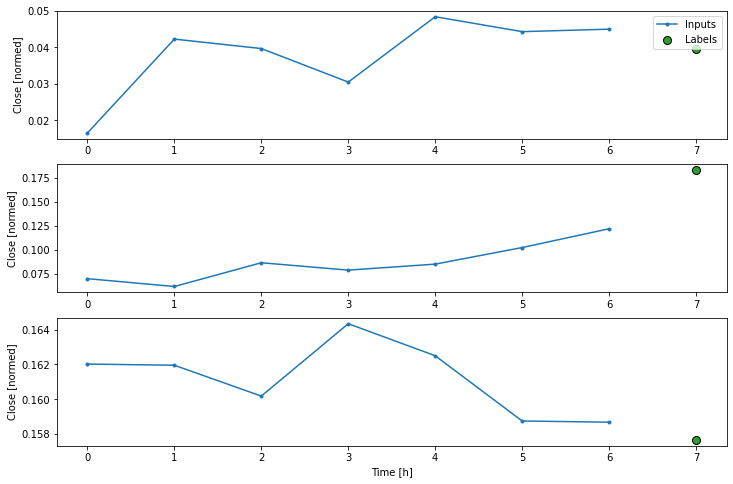

In [48]:
w2.plot()

In [49]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [50]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [51]:
# Each element is an (inputs, label) pair.
w2.train.element_spec

(TensorSpec(shape=(None, 7, 12), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [52]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 7, 12)
Labels shape (batch, time, features): (32, 1, 1)


In [53]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['Close'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['Close']

In [54]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 12)
Labels shape (batch, time, features): (32, 1, 1)


### Baseline

In [55]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [56]:
baseline = Baseline(label_index=column_indices['Close'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

53/53 [==============================] - 0s 1ms/step - loss: 1.5838e-05 - mean_absolute_error: 0.0027


In [57]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['Close'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['Close']

In [58]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 12)
Output shape: (32, 24, 1)


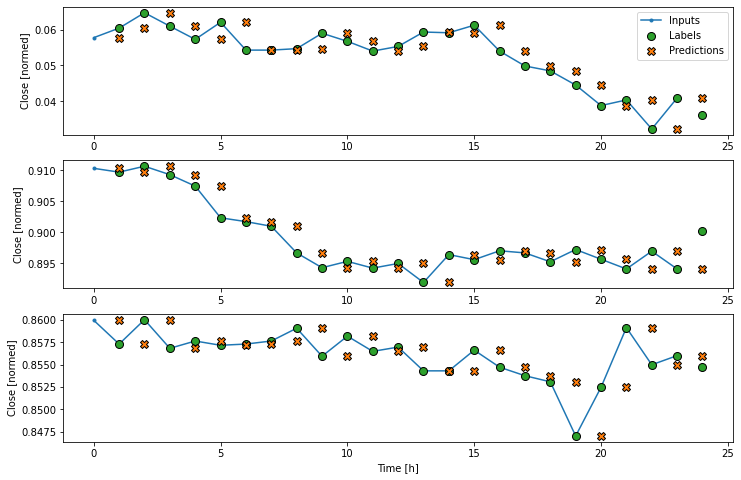

In [59]:
wide_window.plot(baseline)

### Linear

In [60]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [61]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 12)
Output shape: (32, 1, 1)


In [62]:
MAX_EPOCHS = 1000000

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [63]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/1000000
184/184 [==============================] - 1s 3ms/step - loss: 0.1791 - mean_absolute_error: 0.3549 - val_loss: 0.0636 - val_mean_absolute_error: 0.2313
Epoch 2/1000000
184/184 [==============================] - 0s 3ms/step - loss: 0.0153 - mean_absolute_error: 0.0966 - val_loss: 0.0142 - val_mean_absolute_error: 0.0950
Epoch 3/1000000
184/184 [==============================] - 0s 3ms/step - loss: 0.0099 - mean_absolute_error: 0.0780 - val_loss: 0.0102 - val_mean_absolute_error: 0.0802
Epoch 4/1000000
184/184 [==============================] - 0s 3ms/step - loss: 0.0079 - mean_absolute_error: 0.0691 - val_loss: 0.0077 - val_mean_absolute_error: 0.0702
Epoch 5/1000000
184/184 [==============================] - 1s 3ms/step - loss: 0.0062 - mean_absolute_error: 0.0611 - val_loss: 0.0057 - val_mean_absolute_error: 0.0604
Epoch 6/1000000
184/184 [==============================] - 1s 3ms/step - loss: 0.0050 - mean_absolute_error: 0.0541 - val_loss: 0.0043 - val_mean_absolute_

Epoch 47/1000000
184/184 [==============================] - 1s 3ms/step - loss: 8.4763e-07 - mean_absolute_error: 1.9645e-04 - val_loss: 2.0617e-07 - val_mean_absolute_error: 1.3305e-04
Epoch 48/1000000
53/53 [==============================] - 0s 2ms/step - loss: 2.0634e-07 - mean_absolute_error: 1.3428e-04


In [64]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 12)
Output shape: (32, 24, 1)


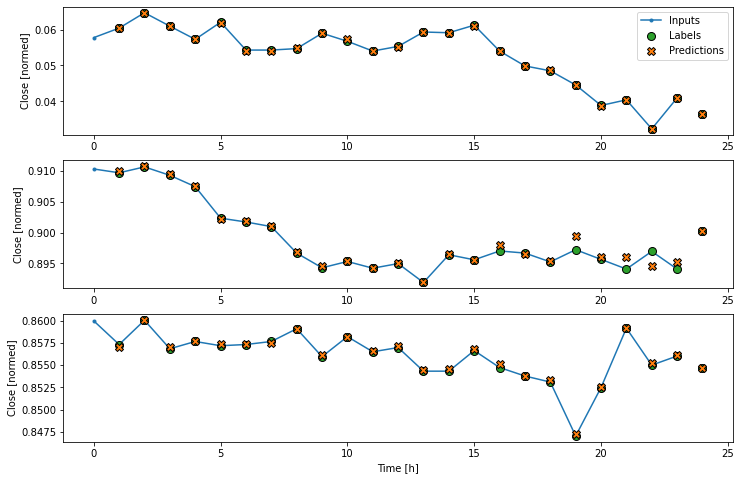

In [65]:
wide_window.plot(linear)

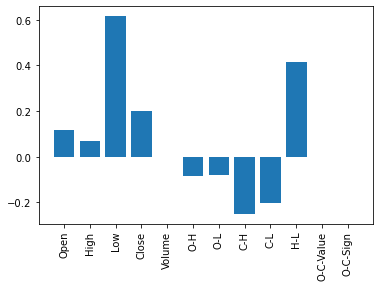

In [66]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

### Dense

In [67]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/1000000
184/184 [==============================] - 1s 5ms/step - loss: 0.0092 - mean_absolute_error: 0.0374 - val_loss: 5.6745e-05 - val_mean_absolute_error: 0.0063
Epoch 2/1000000
184/184 [==============================] - 1s 4ms/step - loss: 2.4395e-05 - mean_absolute_error: 0.0033 - val_loss: 1.9312e-05 - val_mean_absolute_error: 0.0032
Epoch 3/1000000
184/184 [==============================] - 1s 4ms/step - loss: 1.3277e-05 - mean_absolute_error: 0.0023 - val_loss: 1.3060e-05 - val_mean_absolute_error: 0.0026
Epoch 4/1000000
184/184 [==============================] - 1s 4ms/step - loss: 9.0888e-06 - mean_absolute_error: 0.0019 - val_loss: 9.6531e-06 - val_mean_absolute_error: 0.0023
Epoch 5/1000000
184/184 [==============================] - 1s 4ms/step - loss: 7.2971e-06 - mean_absolute_error: 0.0017 - val_loss: 7.6802e-06 - val_mean_absolute_error: 0.0019
Epoch 6/1000000
184/184 [==============================] - 1s 4ms/step - loss: 5.8519e-06 - mean_absolute_error: 0.0015

### Multi-Step Dense

In [68]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['Close'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['Close']

Text(0.5, 1.0, 'Given 3 hours of inputs, predict 1 hour into the future.')

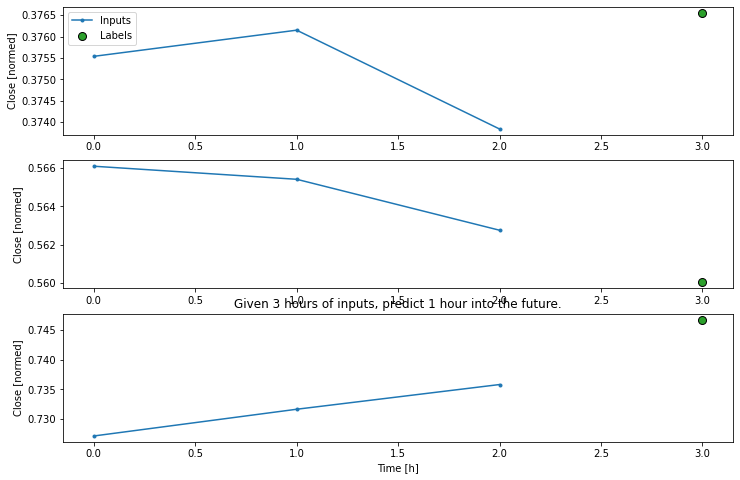

In [69]:
conv_window.plot()
plt.title("Given 3 hours of inputs, predict 1 hour into the future.")

In [70]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [71]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 3, 12)
Output shape: (32, 1, 1)


In [72]:
history = compile_and_fit(multi_step_dense, conv_window)

# IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

Epoch 1/1000000
184/184 [==============================] - 1s 3ms/step - loss: 0.0085 - mean_absolute_error: 0.0487 - val_loss: 5.3276e-04 - val_mean_absolute_error: 0.0178
Epoch 2/1000000
184/184 [==============================] - 1s 3ms/step - loss: 3.2596e-04 - mean_absolute_error: 0.0133 - val_loss: 2.0205e-04 - val_mean_absolute_error: 0.0111
Epoch 3/1000000
184/184 [==============================] - 1s 3ms/step - loss: 1.8630e-04 - mean_absolute_error: 0.0100 - val_loss: 1.5765e-04 - val_mean_absolute_error: 0.0099
Epoch 4/1000000
184/184 [==============================] - 1s 3ms/step - loss: 1.2905e-04 - mean_absolute_error: 0.0083 - val_loss: 8.0848e-05 - val_mean_absolute_error: 0.0070
Epoch 5/1000000
184/184 [==============================] - 1s 3ms/step - loss: 9.3616e-05 - mean_absolute_error: 0.0071 - val_loss: 5.6856e-05 - val_mean_absolute_error: 0.0058
Epoch 6/1000000
184/184 [==============================] - 1s 3ms/step - loss: 6.8932e-05 - mean_absolute_error: 0.0060

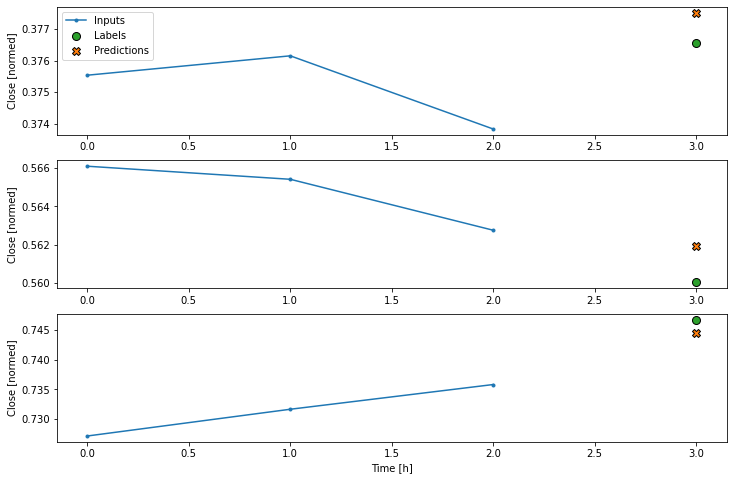

In [73]:
conv_window.plot(multi_step_dense)

In [74]:
print('Input shape:', wide_window.example[0].shape)
try:
  print('Output shape:', multi_step_dense(wide_window.example[0]).shape)
except Exception as e:
  print(f'\n{type(e).__name__}:{e}')

Input shape: (32, 24, 12)

ValueError:Exception encountered when calling layer "sequential_2" (type Sequential).

Input 0 of layer "dense_4" is incompatible with the layer: expected axis -1 of input shape to have value 36, but received input with shape (32, 288)

Call arguments received:
  • inputs=tf.Tensor(shape=(32, 24, 12), dtype=float32)
  • training=None
  • mask=None


### Convolution Neural Network

In [75]:
# conv_model = tf.keras.Sequential([
#     tf.keras.layers.Conv1D(filters=32,
#                            kernel_size=(CONV_WIDTH,),
#                            activation='relu'),
#     tf.keras.layers.Dense(units=32, activation='relu'),
#     tf.keras.layers.Dense(units=1),
# ])

In [76]:
# print("Conv model on `conv_window`")
# print('Input shape:', conv_window.example[0].shape)
# print('Output shape:', conv_model(conv_window.example[0]).shape)

In [77]:
# history = compile_and_fit(conv_model, conv_window)

# # IPython.display.clear_output()
# val_performance['Conv'] = conv_model.evaluate(conv_window.val)
# performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

In [78]:
# print("Wide window")
# print('Input shape:', wide_window.example[0].shape)
# print('Labels shape:', wide_window.example[1].shape)
# print('Output shape:', conv_model(wide_window.example[0]).shape)

In [79]:
# LABEL_WIDTH = 24
# INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
# wide_conv_window = WindowGenerator(
#     input_width=INPUT_WIDTH,
#     label_width=LABEL_WIDTH,
#     shift=1,
#     label_columns=['Close'])

# wide_conv_window

In [80]:
# print("Wide conv window")
# print('Input shape:', wide_conv_window.example[0].shape)
# print('Labels shape:', wide_conv_window.example[1].shape)
# print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

In [81]:
# wide_conv_window.plot(conv_model)

### Recurrent Neural Network

In [82]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [83]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 24, 12)
Output shape: (32, 24, 1)


In [84]:
history = compile_and_fit(lstm_model, wide_window)

# IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

Epoch 1/1000000
184/184 [==============================] - 3s 9ms/step - loss: 0.0241 - mean_absolute_error: 0.0896 - val_loss: 0.0110 - val_mean_absolute_error: 0.0422
Epoch 2/1000000
184/184 [==============================] - 1s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0252 - val_loss: 0.0025 - val_mean_absolute_error: 0.0213
Epoch 3/1000000
184/184 [==============================] - 1s 6ms/step - loss: 7.2767e-04 - mean_absolute_error: 0.0139 - val_loss: 5.9299e-04 - val_mean_absolute_error: 0.0117
Epoch 4/1000000
184/184 [==============================] - 1s 6ms/step - loss: 2.7594e-04 - mean_absolute_error: 0.0084 - val_loss: 2.1954e-04 - val_mean_absolute_error: 0.0075
Epoch 5/1000000
184/184 [==============================] - 1s 7ms/step - loss: 1.5914e-04 - mean_absolute_error: 0.0063 - val_loss: 1.2629e-04 - val_mean_absolute_error: 0.0061
Epoch 6/1000000
184/184 [==============================] - 1s 6ms/step - loss: 1.0484e-04 - mean_absolute_error: 0.0051 - val_loss:

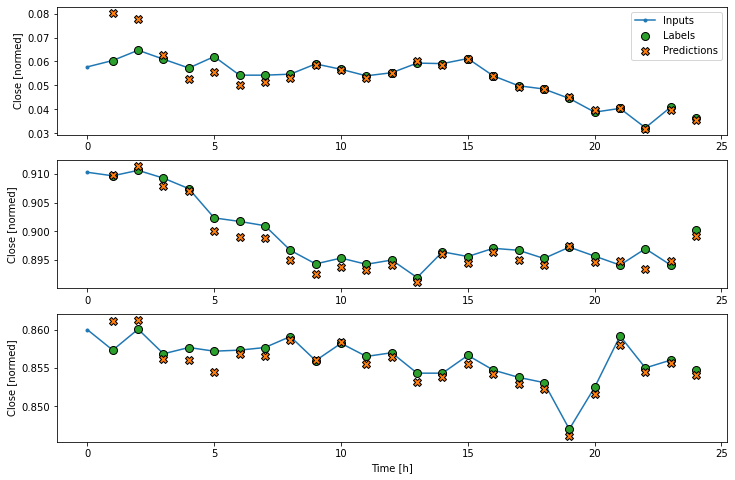

In [85]:
wide_window.plot(lstm_model)

### Performance

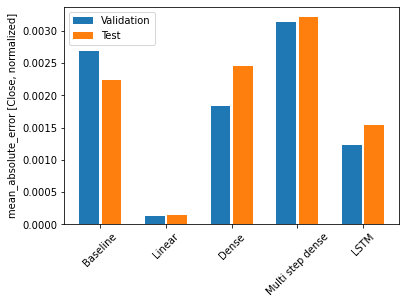

In [86]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [Close, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [87]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 0.0022
Linear      : 0.0001
Dense       : 0.0025
Multi step dense: 0.0032
LSTM        : 0.0015


### Save Model and Params

In [ ]:
linear.save('../models/linear')

In [523]:
import json

unNormalizeParams2 = unNormalizeParams.copy()

unNormalizeParams2['DateTime']['min'] = unNormalizeParams2['DateTime']['min'].strftime("%Y-%m-%d %H:%M:%S")
unNormalizeParams2['DateTime']['max'] = unNormalizeParams2['DateTime']['max'].strftime("%Y-%m-%d %H:%M:%S")

json_object = json.dumps(unNormalizeParams2, indent = 4)

with open('../models/linear/unnormalized_parameters.json', 'w') as outfile:
    outfile.write(json_object)

# Predict

In [570]:
prediction = linear.predict(df_min_max_scaled)
prediction

array([[ 0.20510148],
       [ 0.20379016],
       [ 0.17705555],
       [ 0.16872539],
       [ 0.19299442],
       [ 0.22109914],
       [ 0.19819872],
       [ 0.19106938],
       [ 0.12800911],
       [ 0.14664301],
       [ 0.15969832],
       [ 0.11725391],
       [ 0.05852538],
       [ 0.09426644],
       [ 0.13991141],
       [ 0.11553746],
       [ 0.13565318],
       [ 0.16154787],
       [ 0.16213298],
       [ 0.14724484],
       [ 0.15686174],
       [ 0.19607024],
       [ 0.23018761],
       [ 0.2517361 ],
       [ 0.24656987],
       [ 0.1976138 ],
       [ 0.16267942],
       [ 0.16441816],
       [ 0.14566359],
       [ 0.12439951],
       [ 0.1382122 ],
       [ 0.14843929],
       [ 0.16999824],
       [ 0.1629428 ],
       [ 0.10260448],
       [ 0.07170047],
       [ 0.04647555],
       [ 0.05198298],
       [ 0.06490332],
       [-0.00726957],
       [ 0.04713143],
       [ 0.15917975],
       [ 0.17951518],
       [ 0.19793306],
       [ 0.20472433],
       [ 0

In [571]:
prediction[0]

array([0.20510148], dtype=float32)

In [572]:
import json

f = open('../models/linear/unnormalized_parameters.json')
data = json.load(f)
f.close()

In [573]:
data['Close']

{'min': 1.22784, 'max': 1.31454}

In [574]:
# X = normX * (maxX - minX) + minX
predicted = (prediction[0] * (data['Close']['max'] - data['Close']['min']) + data['Close']['min'])[0]
predicted = round2(predicted, 5)
predicted

1.24562

In [575]:
current_candle = df_trans3.iloc[[0]]
current_candle

,DateTime,Open,High,Low,Close,Volume,O-H,O-L,C-H,C-L,H-L,O-C-Value,O-C-Sign
195,2022-05-07 00:45:00,1.2357,1.23621,1.23523,1.23571,2633,0.00051,0.00047,0.0005,0.00048,0.00098,0.00001,1


In [576]:
current_close = current_candle['Close'].values[0]
current_close

1.23571

In [577]:
change = round2((predicted - current_close), 5)
change

0.00991

In [581]:
CONFIDENCE_THRESHOLD = 0.002
PROFIT_PIP = 0.00025

if abs(change) > CONFIDENCE_THRESHOLD:
    if change > 0:
        print("BUY")
        print(f'''Limit: {round2(current_close+PROFIT_PIP, 5)}''')
    elif change < 0:
        print("SELL")
        print(f'''Limit: {round2(current_close-PROFIT_PIP, 5)}''')
    else:
        print("NEUTRAL")

BUY
Limit: 1.23596
